#### Representing strategies

In the options module, we have the ability to represent trading strategies in the `CombinationTrade` object. Here, we will show an example of a trade that we put on and the profit and loss characteristics of that trade. 


The trade that we will use is a *Short Call Vertical* on Coinbase stock that was initiated on 3/10/2023. The details are as follows: 

* Short a call on COIN with a strike of 55. The premium that we got for this was 7.60
* Long a call on COIN with a strike of 65. The premium paid was 4.00. 
* Both of these calls have an expiry of April 14th, 2023

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

from datetime import date
from options.options import CallOption, PutOption
from options.enums import OptionClass, OptionExerciseType, TradeSide
from options.positions import Trade, CombinationTrade

In [6]:
# First, we create each of the options
expiry_date = date(2023, 4, 14)
short_call_option = CallOption(underlying='COIN', strike = 55, exercise_type=OptionExerciseType.AMERICAN, expiry_date=expiry_date)
long_call_option = CallOption(underlying='COIN', strike = 65, exercise_type=OptionExerciseType.AMERICAN, expiry_date=expiry_date)

# We create the trades
short_call_trade= Trade(
    side = TradeSide.SHORT, 
    quantity = 1, 
    option = short_call_option, 
    cost = 7.60
)

long_call_trade = Trade(
    side = TradeSide.LONG, 
    quantity = 1, 
    option = long_call_option, 
    cost = 4
)

# Lastly we put them all together into a CombinationTrade object
short_call_vertical = CombinationTrade(trades = [short_call_trade, long_call_trade])

In [16]:
expiry_prices = np.arange(40, 80)
strategy_profits_at_expiry = short_call_vertical.profits_at_expiry(prices = expiry_prices)
black_scholes_profit_loss = short_call_vertical.black_scholes_profit_vary_underlying(
    S = expiry_prices, 
    sigma = 0.4, 
    r = 0.05
)


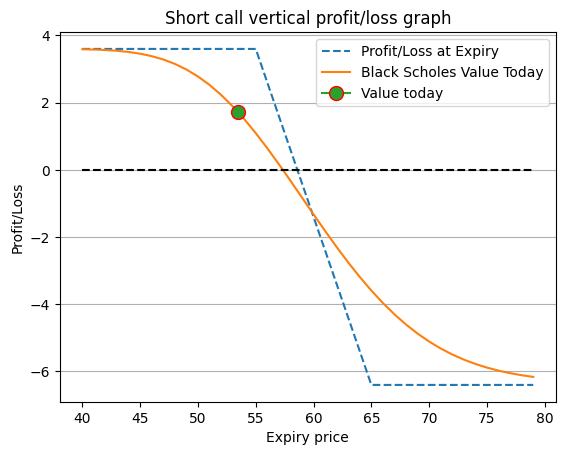

In [34]:
current_underlying_price = 53.44
value_on_curve = np.interp(x = current_underlying_price, xp = expiry_prices, fp = black_scholes_profit_loss)
plt.plot(expiry_prices, strategy_profits_at_expiry, label = "Profit/Loss at Expiry", linestyle = '--')
plt.plot(expiry_prices, black_scholes_profit_loss, label = 'Black Scholes Value Today')
plt.plot([current_underlying_price], [value_on_curve], marker = 'o', markersize = 10, markeredgecolor = 'red', label = 'Value today')
plt.legend()
plt.hlines(y = 0, xmin = expiry_prices[0], xmax = expiry_prices[-1], color = 'black', linestyles='--')
plt.title("Short call vertical profit/loss graph")
plt.grid(axis = 'y')
plt.xlabel("Expiry price")
plt.ylabel("Profit/Loss")
plt.show()
